In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


In [2]:
dataset=pd.read_csv('framingham.csv')

In [36]:
dataset

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0,0


In [4]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
dataset.drop(['cigsPerDay'],axis=1,inplace=True)

In [6]:
dataset

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [7]:
dataset.drop(['education'],axis=1,inplace=True)

In [8]:
dataset


,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [9]:
dataset.isna().sum()

male                 0
age                  0
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
dataset['BPMeds']=dataset['BPMeds'].fillna(dataset['BPMeds'].mode()[0])
dataset['totChol']=dataset['totChol'].fillna(dataset['totChol'].mode()[0])
dataset['BMI']=dataset['BMI'].fillna(dataset['BMI'].mode()[0])
dataset['glucose']=dataset['glucose'].fillna(dataset['glucose'].mode()[0])
dataset['heartRate']=dataset['heartRate'].fillna(dataset['heartRate'].mode()[0])

In [11]:
dataset.isna().sum()

male               0
age                0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   BPMeds           4238 non-null   float64
 4   prevalentStroke  4238 non-null   int64  
 5   prevalentHyp     4238 non-null   int64  
 6   diabetes         4238 non-null   int64  
 7   totChol          4238 non-null   float64
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4238 non-null   float64
 11  heartRate        4238 non-null   float64
 12  glucose          4238 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 463.7 KB


In [13]:
dataset


,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0,0


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

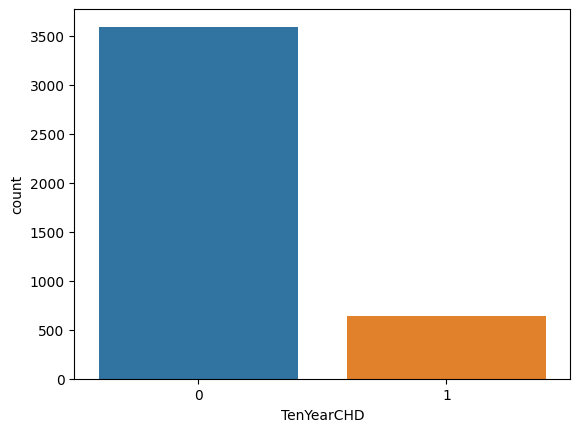

In [14]:
sns.countplot(x='TenYearCHD',data=dataset)

<AxesSubplot:xlabel='male', ylabel='count'>

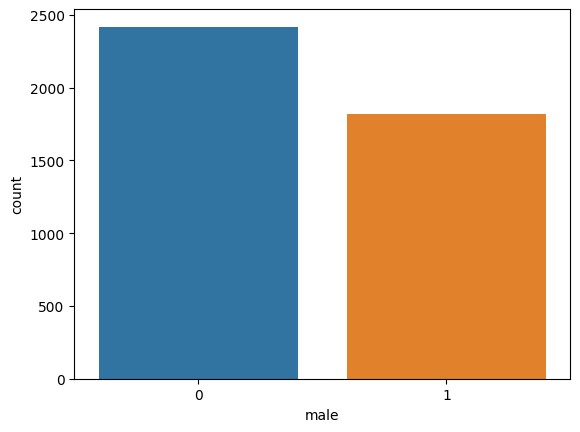

In [15]:
sns.countplot(x='male',data=dataset)

<AxesSubplot:xlabel='male', ylabel='count'>

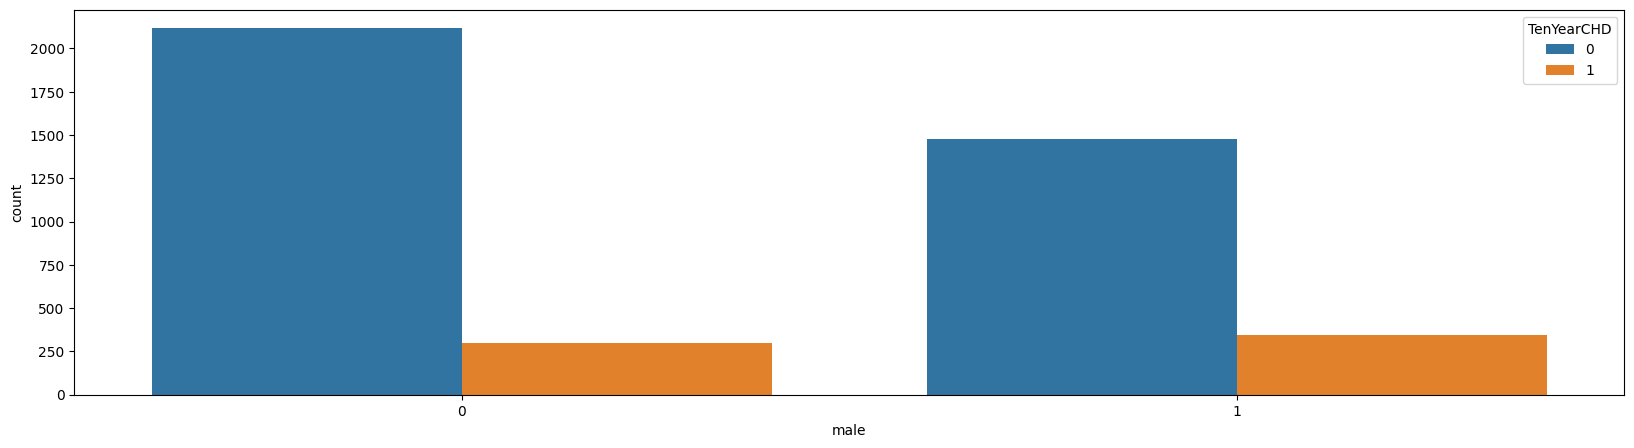

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x=dataset['male'],hue=dataset['TenYearCHD'])

<AxesSubplot:>

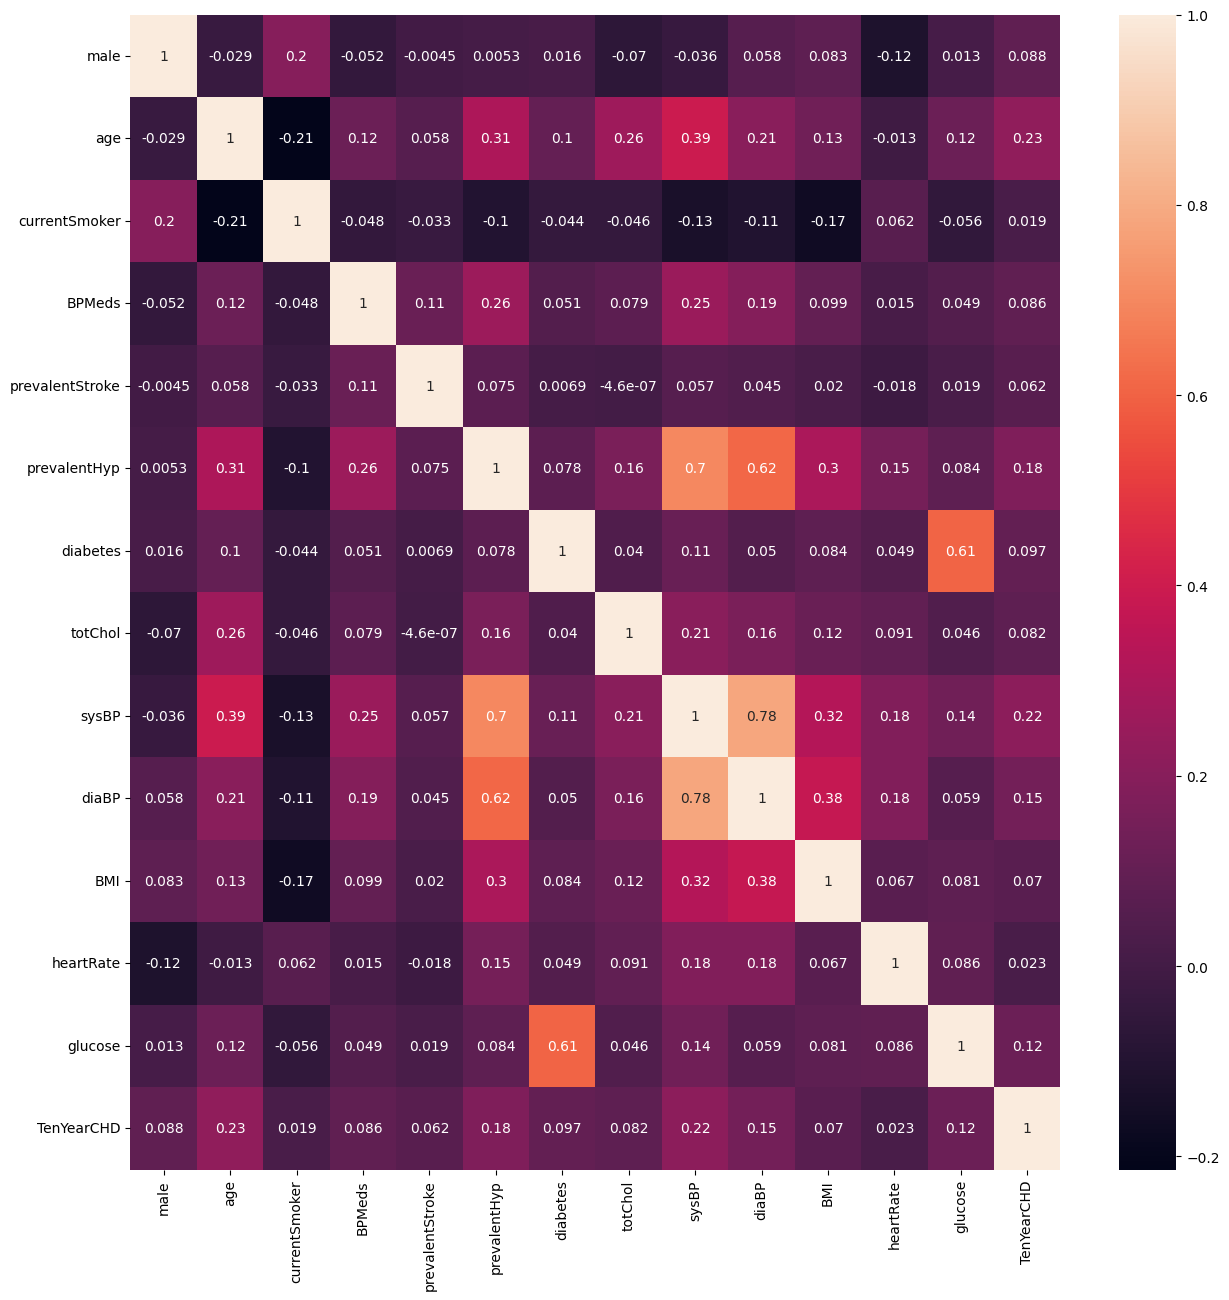

In [17]:
corr=dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

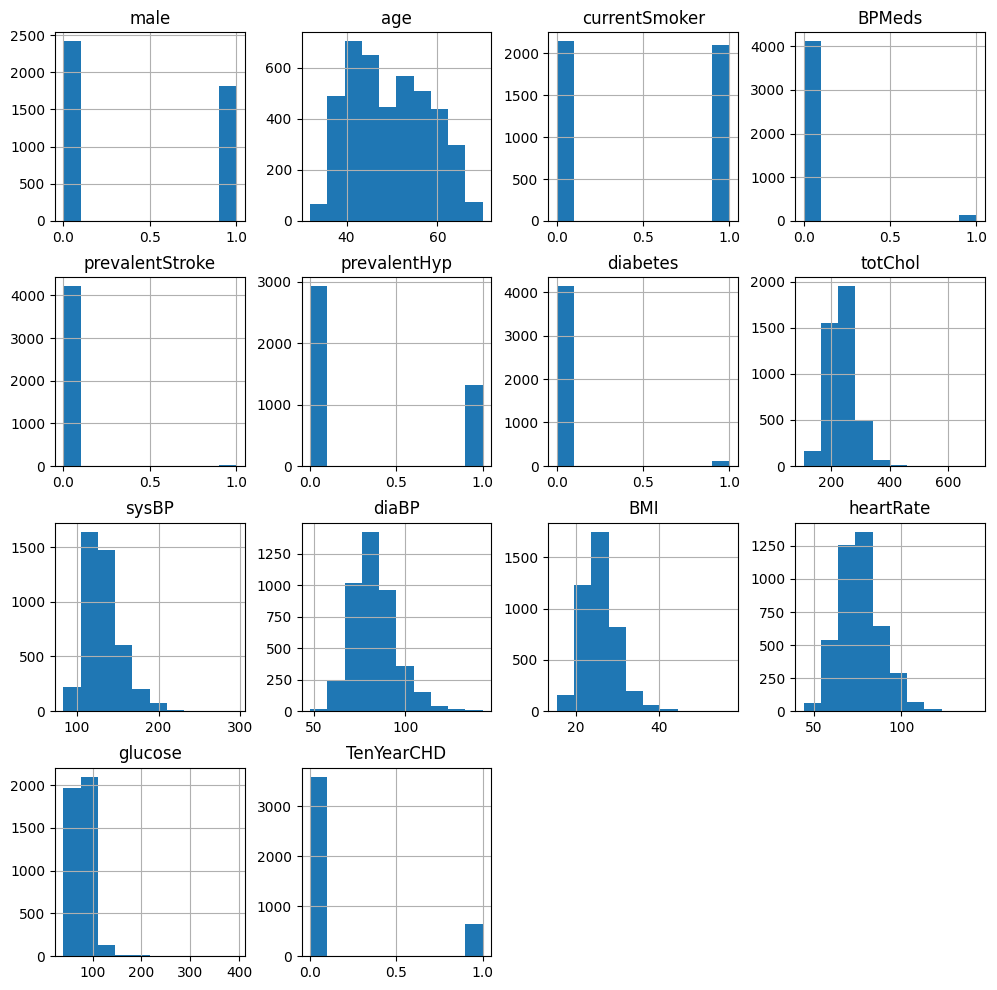

In [18]:
dataset.hist(figsize=(12,12))
plt.show()

In [19]:
dataset1=pd.get_dummies(dataset,columns=['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

In [20]:
dataset1

,male,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,1,39,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0,1,0,1,0,1,0,1,0
1,0,46,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,1,0,1,0,1,0,1,0
2,1,48,245.0,127.5,80.0,25.34,75.0,70.0,0,0,1,1,0,1,0,1,0,1,0
3,0,61,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,1,0,1,0,0,1,1,0
4,0,46,285.0,130.0,84.0,23.10,85.0,85.0,0,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,313.0,179.0,92.0,25.97,66.0,86.0,1,0,1,1,0,1,0,0,1,1,0
4234,1,51,207.0,126.5,80.0,19.71,65.0,68.0,0,0,1,1,0,1,0,1,0,1,0
4235,0,48,248.0,131.0,72.0,22.00,84.0,86.0,0,0,1,1,0,1,0,1,0,1,0
4236,0,44,210.0,126.5,87.0,19.16,86.0,75.0,0,0,1,1,0,1,0,1,0,1,0


In [21]:
dataset

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0,0


In [22]:
dataset1

,male,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,1,39,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0,1,0,1,0,1,0,1,0
1,0,46,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,1,0,1,0,1,0,1,0
2,1,48,245.0,127.5,80.0,25.34,75.0,70.0,0,0,1,1,0,1,0,1,0,1,0
3,0,61,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,1,0,1,0,0,1,1,0
4,0,46,285.0,130.0,84.0,23.10,85.0,85.0,0,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,313.0,179.0,92.0,25.97,66.0,86.0,1,0,1,1,0,1,0,0,1,1,0
4234,1,51,207.0,126.5,80.0,19.71,65.0,68.0,0,0,1,1,0,1,0,1,0,1,0
4235,0,48,248.0,131.0,72.0,22.00,84.0,86.0,0,0,1,1,0,1,0,1,0,1,0
4236,0,44,210.0,126.5,87.0,19.16,86.0,75.0,0,0,1,1,0,1,0,1,0,1,0


In [23]:
col=['male', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','currentSmoker_0', 'currentSmoker_1', 'BPMeds_0.0', 'BPMeds_1.0','prevalentStroke_0','prevalentStroke_1','prevalentHyp_0','prevalentHyp_1','diabetes_0','diabetes_1']

In [24]:
x=dataset1[col]
y=dataset1.TenYearCHD

In [25]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2, random_state = 42)

In [26]:
x_train.shape

(3390, 18)

In [27]:
x_test.shape

(848, 18)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
x_train

array([[ 1.16861732, -1.11033368, -0.71754711, ..., -0.67541511,
         0.16037022, -0.16037022],
       [-0.85571212,  0.87196279,  0.29418019, ...,  1.48057097,
         0.16037022, -0.16037022],
       [-0.85571212, -0.29409396, -0.15547639, ..., -0.67541511,
         0.16037022, -0.16037022],
       ...,
       [-0.85571212,  1.22177981,  1.37335598, ...,  1.48057097,
         0.16037022, -0.16037022],
       [ 1.16861732, -1.22693936, -0.49271882, ..., -0.67541511,
         0.16037022, -0.16037022],
       [-0.85571212, -1.69336206,  0.24921453, ..., -0.67541511,
         0.16037022, -0.16037022]])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred=classifier.predict(x_test)

In [32]:
x_test

array([[ 1.16861732,  1.57159684, -1.05478954, ...,  1.48057097,
         0.16037022, -0.16037022],
       [ 1.16861732, -0.52730531, -1.68430875, ..., -0.67541511,
         0.16037022, -0.16037022],
       [-0.85571212,  0.17232874,  0.54149131, ..., -0.67541511,
         0.16037022, -0.16037022],
       ...,
       [ 1.16861732,  0.05572307,  1.01363071, ..., -0.67541511,
         0.16037022, -0.16037022],
       [ 1.16861732,  1.68820251, -0.9423754 , ...,  1.48057097,
        -6.23557158,  6.23557158],
       [ 1.16861732,  0.63875144, -0.51520165, ..., -0.67541511,
         0.16037022, -0.16037022]])

In [33]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

<AxesSubplot:>

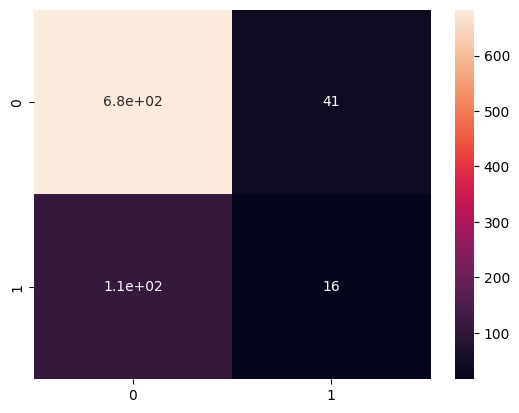

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8242924528301887

In [37]:
import pickle
pickle.dump(classifier,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))